# **Primera parctica en aula**
Aris Vazdekis Soria y Alejandra Ruiz de Adana Fleitas

# Extracción y Preprosamiento

### Librerias

In [1]:
import os
from Bio import SeqIO

### Leer archivo

In [2]:
def leer_archivos_fasta(directorio):
    diccionario_secuencias = {}
    
    # Iterar sobre cada archivo en el directorio
    for archivo in os.listdir(directorio):
        if archivo.endswith(".fasta"):  # Verifica que sea un archivo FASTA
            ruta_archivo = os.path.join(directorio, archivo)
            # Leer las secuencias del archivo usando SeqIO
            for record in SeqIO.parse(ruta_archivo, "fasta"):
                clave = record.id  # Obtener el identificador del registro
                secuencia = str(record.seq)  # Convertir la secuencia a string
                diccionario_secuencias[clave] = secuencia  # Almacenar en el diccionario
    
    return diccionario_secuencias

# Usar la función
directorio = r'C:\Users\Usuario\Desktop\UNIVERSIDAD\CUARTOANO\PRIMERCUATRI\BIO\Practicas_en_aula\Tarea1\Archivos_fasta'
diccionario_resultados = leer_archivos_fasta(directorio)

# Imprimir el diccionario
for clave, valor in diccionario_resultados.items():
    print(f"{clave}: {valor[:30]}...")  # Imprime solo los primeros 30 caracteres de cada secuencia


NM_001008784.4: GTAGAAGAAACATCACTCAGATCTCTGCCT...
NM_001009615.3: ATCCTCCTGGCAAGCTTCAATATAGCTGTG...
NM_001014445.2: GTGCGTGGATGGGGGCGGGGGGCGTCGCCG...
NM_001015049.5: CTGCAGGCGCGCCCTGGCACCCGGGCCAAG...
NM_001042490.6: GAGAGTCCTTCTAGCGGCGCCGGTGAGTCC...
NM_001089591.2: ATGGGACTGGAGGACGAGCAAAAGATGCTT...
NM_001099270.4: GCGGGCTGGGGCGGCAGCCGGAGCGGCGGG...
NM_001142546.4: AGTCGGCCCATGAGTATTTCATGAAGTGCC...
NM_001142640.2: AGTTAGAGCAACAAGATGGCCGCGGTGGCA...
NM_001161586.3: GCATTTAGTCTTGCCAAGATGGAGAGTCTC...
NM_001258312.3: AGTAGTACAGTAGCAGGCTCACATGAGCAT...
NM_001261825.2: AGATTGACTAGACGGCCAGCCTGTTAAGGT...
NM_001267039.4: ATCCTATGACGCGAAAGTAACCGAGACTAT...
NM_001304833.2: GCTTCACTATGGCGACGGTGGGGGCTCCGC...
NM_001320371.4: GCGCACGGCGAATCCACCGGTACCGTGGTG...
NM_001354431.4: CTTCCCCAGGCGCGCGCTCTCCACCTGGTG...
NM_001354432.4: CTTCCCCAGGCGCGCGCTCTCCACCTGGTG...
NM_001363871.4: CTTTCGGAGCTTGACCAGCATGTGGAAGGA...
NM_001364567.2: GAGAGTCCTTCTAGCGGCGCCGGCTGGAGT...
NM_001364568.3: GAGAGTCCTTCTAGCGGCGCCGGTGAGTCC...


### Comprobador de codones

In [3]:
def search_first_codon(diccionario):
    for clave, valor in diccionario.items():
        # Verificamos cada codón en la secuencia
        contador_codon_iniciales = 0
        for i in range(0, len(valor), 3):
            codon = valor[i:i+3]  # Extraemos el codón
            if codon == "ATG":  # Comprobamos si es el codón de inicio
                contador_codon_iniciales += 1
                
        if contador_codon_iniciales > 0:
            print(f"El ARMm {clave} si tiene un codon de iniciación" )

        else:
            print(f"El ARMm {clave} no tiene un codon de iniciación" )
    return 1

def search_end_codon(diccionario):
    for clave, valor in diccionario.items():
        # Verificamos cada codón en la secuencia
        contador_codon_finales = 0
        for i in range(0, len(valor), 3):
            codon = valor[i:i+3]  # Extraemos el codón
            if codon == "TAA" or codon == "TAG" or codon == "TGA" :  # Comprobamos si es el codón de terminación
                contador_codon_finales += 1
                
        if contador_codon_finales > 0:
            print(f"El ARMm {clave} si tiene un codon de terminación" )

        else:
            print(f"El ARMm {clave} no tiene un codon de terminación" )
    return 1


search_first_codon(diccionario_resultados)
search_end_codon(diccionario_resultados)



El ARMm NM_001008784.4 si tiene un codon de iniciación
El ARMm NM_001009615.3 si tiene un codon de iniciación
El ARMm NM_001014445.2 si tiene un codon de iniciación
El ARMm NM_001015049.5 si tiene un codon de iniciación
El ARMm NM_001042490.6 si tiene un codon de iniciación
El ARMm NM_001089591.2 si tiene un codon de iniciación
El ARMm NM_001099270.4 si tiene un codon de iniciación
El ARMm NM_001142546.4 si tiene un codon de iniciación
El ARMm NM_001142640.2 si tiene un codon de iniciación
El ARMm NM_001161586.3 si tiene un codon de iniciación
El ARMm NM_001258312.3 si tiene un codon de iniciación
El ARMm NM_001261825.2 si tiene un codon de iniciación
El ARMm NM_001267039.4 si tiene un codon de iniciación
El ARMm NM_001304833.2 si tiene un codon de iniciación
El ARMm NM_001320371.4 si tiene un codon de iniciación
El ARMm NM_001354431.4 si tiene un codon de iniciación
El ARMm NM_001354432.4 si tiene un codon de iniciación
El ARMm NM_001363871.4 si tiene un codon de iniciación
El ARMm NM

1

# Clasificación

### Librerias

In [4]:
from Bio import SeqIO
import os
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
# ------------------------ Lectura archivos fasta ------------------------
def leer_fasta(carpeta_fasta):
    secuencias = []
    for archivo in os.listdir(carpeta_fasta):
        if archivo.endswith(".fasta"):
            ruta_archivo = os.path.join(carpeta_fasta, archivo)
            with open(ruta_archivo, "r") as fasta_file:
                for record in SeqIO.parse(fasta_file, "fasta"):
                    secuencias.append(str(record.seq))
    return secuencias

# ------------------------ Conversión a vectores con lista de aminoácidos ------------------------
def convertir_a_vectores(secuencias):
    aminoacidos = "ACDEFGHIKLMNPQRSTVWY"  # Los 20 aminoácidos estándar
    vectores = []
    
    for secuencia in secuencias:
        vector = [secuencia.count(aa) for aa in aminoacidos]
        vectores.append(vector)
        
    return np.array(vectores)

### Clasificador DBSCAN

MVFLCMRPVFLFL: Cluster 0
MEQPTSSTNGEKRKSPC: Cluster 0
MGAGGVAAGR: Cluster 1
MQLGAQLRCRTP: Cluster 0
M: Cluster 0
MGLEDEQKMLTESGDP: Cluster 2
MAAVAAPHLSATAPGAV: Cluster 3
MESLRRAF: Cluster 0
MAL: Cluster 0
MATVGAPRHFCRCACFCTD: Cluster 4
MDPL: Cluster 0
MC: Cluster 0
MWKESSHGCN: Cluster 0
MD: Cluster 0
MVGLAPPFRGKPRAPGIARGSAPAPPDL: Cluster 5
MGS: Cluster 0
MYIFLQ: Cluster 0
MCFSAQNS: Cluster 0
MYGLFL: Cluster 0
MEQTWTRDYFAED: Cluster 0
MP: Cluster 0
MQATPS: Cluster 0
MSGRRGPPVSSTGAPRSLGTPSPRAPRRRRC: Cluster 6
MAGRSLCLTRSSVPGTPFPPPVQQPSTPGPDLLALEEEY: Cluster 7
MEEYAREPCPWRIVD: Cluster 0
ML: Cluster 0
MASSNTNFQV: Cluster 0
MEPPGPV: Cluster 0
MGLEPAPNPREPALSAA: Cluster 8
MDC: Cluster 0
MQDPGHLQGPPLALDPPRRQRQERTVYT: Cluster 9
MHVMAASMARGGV: Cluster 1
MCSPCV: Cluster 0
MQPVSP: Cluster 0
MEPGLEHALRRTPSWSSLGGS: Cluster 10
MAAAVPDEAVARDVQRLL: Cluster 11
MDKILEAVV: Cluster 0
MSGRGKQGGKARAKA: Cluster 1
MALSFSLL: Cluster 0
MAGRARRRQRRQRGRRF: Cluster 12


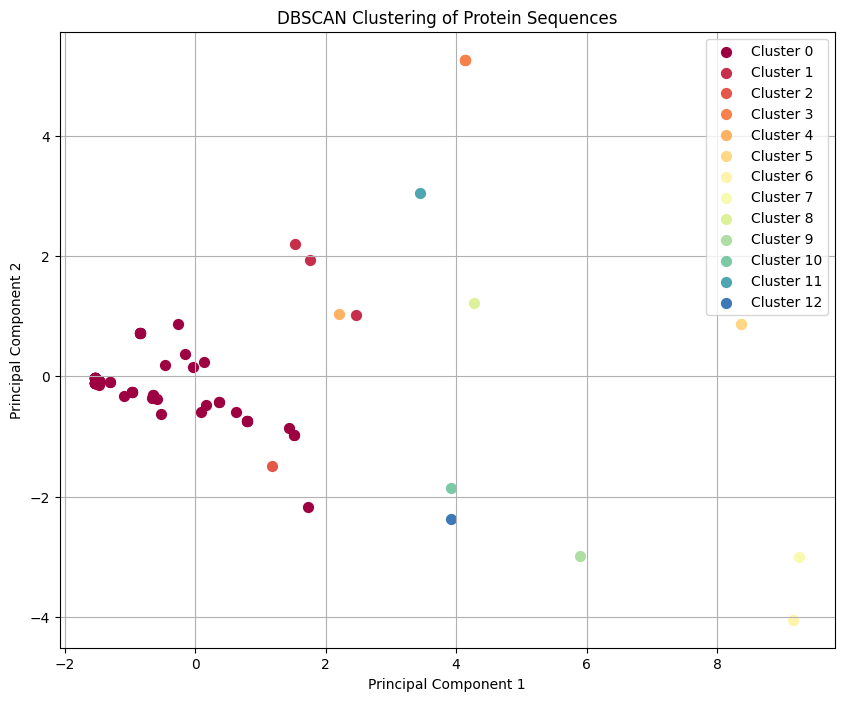

Estimated number of clusters: 13
Estimated number of noise points: 0


In [6]:
def aplicar_dbscan(secuencias, eps=0.5, min_samples=3):
    # Convertir las secuencias a vectores numéricos
    vectores = convertir_a_vectores(secuencias)

    # Aplicar DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(vectores)
    labels = db.labels_

    # Crear un diccionario para almacenar los resultados con etiquetas
    resultados_con_etiquetas = {}
    
    for i, secuencia in enumerate(secuencias):
        if labels[i] == -1:
            resultados_con_etiquetas[secuencia] = "outlier"
        else:
            resultados_con_etiquetas[secuencia] = f"Cluster {labels[i]}"

    # Imprimir los resultados
    for secuencia, label in resultados_con_etiquetas.items():
        print(f"{secuencia}: {label}")

    # Reducción de dimensionalidad usando PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(vectores)

    # Graficar los resultados
    plt.figure(figsize=(10, 8))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(float(i) / len(unique_labels)) for i in range(len(unique_labels))]

    for label in unique_labels:
        color = 'k' if label == -1 else colors[label]  # Color negro para el ruido
        plt.scatter(X_pca[labels == label, 0], X_pca[labels == label, 1], s=50, color=color, 
                    label=f'Cluster {label}' if label != -1 else 'Outliers')

    plt.title('DBSCAN Clustering of Protein Sequences')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

    # Contar clusters y ruido
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

# ------------------------ Ejecución del pipeline ------------------------

# Ruta a la carpeta que contiene los archivos FASTA
ruta = r'C:\Users\Usuario\Desktop\UNIVERSIDAD\CUARTOANO\PRIMERCUATRI\BIO\Practicas_en_aula\Tarea1\Proteinas'

# Leer las secuencias de proteínas y aplicar DBSCAN
proteinas = leer_fasta(ruta)
aplicar_dbscan(proteinas, eps=4, min_samples=1)  # Ajusta eps y min_samples según sea necesario


### Clasificador Kmeans

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\su

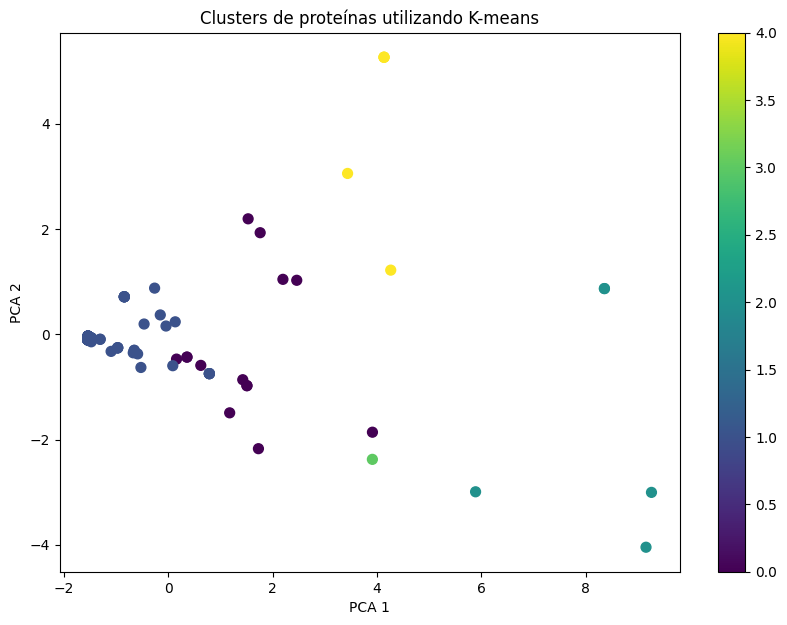

In [8]:
def aplicar_kmeans(vectores, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters)  # Añadir random_state para reproducibilidad
    etiquetas = kmeans.fit_predict(vectores)
    return etiquetas, kmeans

# ------------------------ Graficación ------------------------
def graficar_clusters(vectores, etiquetas):
    pca = PCA(n_components=2)
    vectores_reducidos = pca.fit_transform(vectores)
    
    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(vectores_reducidos[:, 0], vectores_reducidos[:, 1], c=etiquetas, cmap='viridis', s=50)
    plt.title('Clusters de proteínas utilizando K-means')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(scatter)
    plt.show()

# ------------------------ Ejecución del pipeline ------------------------

proteinas = leer_fasta(r"C:\Users\Usuario\Desktop\UNIVERSIDAD\CUARTOANO\PRIMERCUATRI\BIO\Practicas_en_aula\Tarea1\Proteinas")
vectores = convertir_a_vectores(proteinas)
etiquetas, kmeans = aplicar_kmeans(vectores, n_clusters=5)
graficar_clusters(vectores, etiquetas)